# Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Loading Data

In [7]:
# Reading the csv files and turn them into arrays
training1 = pd.read_csv('training1.csv')
training2 = pd.read_csv('training2.csv')
test = pd.read_csv('test.csv')
train1 = training1.values
train2 = training2.values
test = test.values

In [8]:
# Divide the data into cnn features, gist features and labels
train1_cnn = np.zeros((len(train1), 4096))
train1_gist = np.zeros((len(train1), 512))
train1_labels = np.zeros(len(train1))
for i in range(len(train1)):
  train1_cnn[i,:] = train1[i,:4096]
  train1_gist[i,:] = train1[i,4096:4608]
  train1_labels[i] = train1[i, 4608]

train2_cnn = np.zeros((len(train2), 4096))
train2_gist = np.zeros((len(train2), 512))
train2_labels = np.zeros(len(train2))
for i in range(len(train2)):
  train2_cnn[i,:] = train2[i,:4096]
  train2_gist[i,:] = train2[i,4096:4608]
  train2_labels[i] = train2[i, 4608]

test_cnn = np.zeros((len(test), 4096))
test_gist = np.zeros((len(test), 512))
for i in range(len(test)):
  test_cnn[i,:] = test[i,:4096]
  test_gist[i,:] = test[i,4096:4608]

train_labels = np.concatenate((train1_labels, train2_labels), axis=0)

# Data Imputation

In [9]:
# Imputing the missing values by using a KNN imputer
imp = KNNImputer(n_neighbors=2, weights="uniform")
train2_cnn_filled = imp.fit_transform(train2_cnn)
train2_gist_filled = imp.fit_transform(train2_gist)

In [10]:
test_cnn_filled = imp.fit_transform(test_cnn)
test_gist_filled = imp.fit_transform(test_gist)

In [ ]:
train2_cnn_filled.shape

# Data Rescaling


In [11]:
# Rescaling the data to perform dimensionality reduction
scaler = preprocessing.StandardScaler()

train1_cnn_scaled = scaler.fit_transform(train1_cnn)
train1_gist_scaled = scaler.fit_transform(train1_gist)

train2_cnn_scaled = scaler.fit_transform(train2_cnn_filled)
train2_gist_scaled = scaler.fit_transform(train2_gist_filled)

test_cnn_scaled = scaler.fit_transform(test_cnn_filled)
test_gist_scaled = scaler.fit_transform(test_gist_filled)

# Dimensionality Reduction

In [12]:
# Reducing the high dimentionalities using PCA
pca = PCA(n_components=100)
train1_cnn_reduced = pca.fit_transform(train1_cnn_scaled)
train2_cnn_reduced = pca.fit_transform(train2_cnn_scaled)
test_cnn_reduced = pca.fit_transform(test_cnn_scaled)

pca = PCA(n_components=20)
train1_gist_reduced = pca.fit_transform(train1_gist_scaled)
train2_gist_reduced = pca.fit_transform(train2_gist_scaled)
test_gist_reduced = pca.fit_transform(test_gist_scaled)

# Data Preparation

In [13]:
# Combining the CNN features and gist features from two training sets into one for training
train1_x = np.concatenate((train1_cnn_reduced, train1_gist_reduced), axis=1)
train2_x = np.concatenate((train2_cnn_reduced, train2_gist_reduced), axis=1)

# Combine the test data as well to make predictions
test_x = np.concatenate((test_cnn_reduced, test_gist_reduced), axis=1)

In [14]:
train_x = np.concatenate((train1_x, train2_x), axis=0)

In [ ]:
test_x.shape

#  Training & Validation

Text(0, 0.5, 'Accuracies')

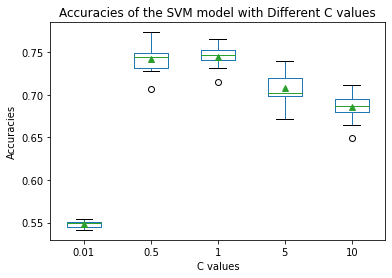

In [62]:
# Trying different C parameters on Support Vector Machine
svm1 = SVC(kernel='rbf', C=0.01)
svm_scores1 = cross_val_score(svm1, train_x, train_labels, cv=10)

svm2 = SVC(kernel='rbf', C=0.5)
svm_scores2 = cross_val_score(svm2, train_x, train_labels, cv=10)

svm3 = SVC(kernel='rbf', C=1)
svm_scores3 = cross_val_score(svm3, train_x, train_labels, cv=10)

svm4 = SVC(kernel='rbf', C=5)
svm_scores4 = cross_val_score(svm4, train_x, train_labels, cv=10)

svm5 = SVC(kernel='rbf', C=10)
svm_scores5 = cross_val_score(svm5, train_x, train_labels, cv=10)

# Plotting the results using boxplot
data_svm = np.array([svm_scores1, svm_scores2, svm_scores3, svm_scores4, svm_scores5])
data_svm = data_svm.T
df = pd.DataFrame(data_svm, columns=['0.01', '0.5', '1', '5', '10'])
ax = df.plot.box(title='Accuracies of the SVM model with Different C values', showmeans=True)
ax.set_xlabel('C values')
ax.set_ylabel('Accuracies')

Text(0, 0.5, 'Accuracies')

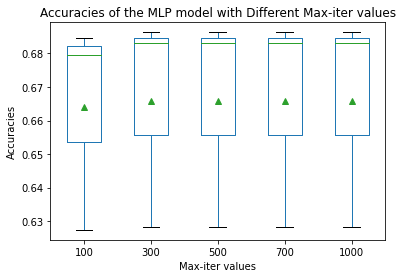

In [64]:
# Trying different max_iter values on Multi-layer Perceptron
mlp1 = MLPClassifier(random_state=0, max_iter=100)
mlp_scores1 = cross_val_score(mlp1, train_x, train_labels, cv=10)

mlp2 = MLPClassifier(random_state=0, max_iter=300)
mlp_scores2 = cross_val_score(mlp2, train_x, train_labels, cv=10)

mlp3 = MLPClassifier(random_state=0, max_iter=500)
mlp_scores3 = cross_val_score(mlp3, train_x, train_labels, cv=10)

mlp4 = MLPClassifier(random_state=0, max_iter=700)
mlp_scores4 = cross_val_score(mlp4, train_x, train_labels, cv=10)

mlp5 = MLPClassifier(random_state=0, max_iter=1000)
mlp_scores5 = cross_val_score(mlp5, train_x, train_labels, cv=10)

data_mlp = np.array([mlp_scores1, mlp_scores2, mlp_scores3, mlp_scores4, mlp_scores5])
data_mlp = data_mlp.T
df = pd.DataFrame(data_mlp, columns=['100', '300', '500', '700', '1000'])
ax = df.plot.box(title='Accuracies of the MLP model with Different Max-iter values', showmeans=True)
ax.set_xlabel('Max-iter values')
ax.set_ylabel('Accuracies')

Text(0, 0.5, 'Accuracies')

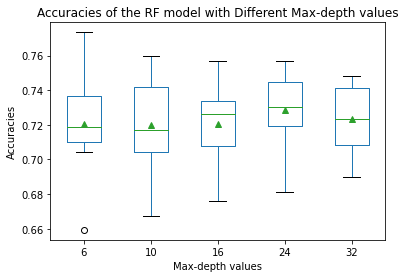

In [65]:
# Trying different max_depth values on Random Forest
rf1 = RandomForestClassifier(max_depth=6, random_state=0)
rf_scores1 = cross_val_score(rf1, train_x, train_labels, cv=10)

rf2 = RandomForestClassifier(max_depth=10, random_state=0)
rf_scores2 = cross_val_score(rf2, train_x, train_labels, cv=10)

rf3 = RandomForestClassifier(max_depth=16, random_state=0)
rf_scores3 = cross_val_score(rf3, train_x, train_labels, cv=10)

rf4 = RandomForestClassifier(max_depth=24, random_state=0)
rf_scores4 = cross_val_score(rf4, train_x, train_labels, cv=10)

rf5 = RandomForestClassifier(max_depth=32, random_state=0)
rf_scores5 = cross_val_score(rf5, train_x, train_labels, cv=10)

data_rf = np.array([rf_scores1, rf_scores2, rf_scores3, rf_scores4, rf_scores5])
data_rf = data_rf.T
df = pd.DataFrame(data_rf, columns=['6', '10', '16', '24', '32'])
ax = df.plot.box(title='Accuracies of the RF model with Different Max-depth values', showmeans=True)
ax.set_xlabel('Max-depth values')
ax.set_ylabel('Accuracies')

Text(0, 0.5, 'Accuracies')

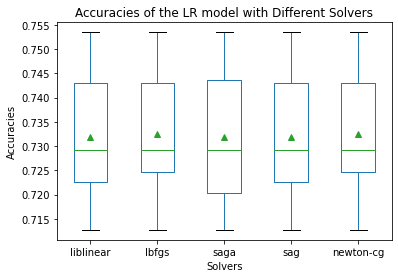

In [66]:
# Trying different solvers on Logistic Regression
lg1 = LogisticRegression(solver='liblinear', random_state=0)
lg_scores1 = cross_val_score(lg1, train_x, train_labels, cv=10)

lg2 = LogisticRegression(solver='lbfgs', random_state=0)
lg_scores2 = cross_val_score(lg2, train_x, train_labels, cv=10)

lg3 = LogisticRegression(solver='saga', random_state=0)
lg_scores3 = cross_val_score(lg3, train_x, train_labels, cv=10)

lg4 = LogisticRegression(solver='sag', random_state=0)
lg_scores4 = cross_val_score(lg4, train_x, train_labels, cv=10)

lg5 = LogisticRegression(solver='newton-cg', random_state=0)
lg_scores5 = cross_val_score(lg5, train_x, train_labels, cv=10)

data_lg = np.array([lg_scores1, lg_scores2, lg_scores3, lg_scores4, lg_scores5])
data_lg = data_lg.T
df = pd.DataFrame(data_lg, columns=['liblinear', 'lbfgs', 'saga', 'sag', 'newton-cg'])
ax = df.plot.box(title='Accuracies of the LR model with Different Solvers', showmeans=True)
ax.set_xlabel('Solvers')
ax.set_ylabel('Accuracies')

In [60]:
# Print the mean accuracies of all settings for all models
print(f"svm - 1: {np.mean(svm_scores1)}, 2: {np.mean(svm_scores2)}, 3: {np.mean(svm_scores3)}, 4: {np.mean(svm_scores4)}, 5: {np.mean(svm_scores5)}")
print(f"mlp - 1: {np.mean(mlp_scores1)}, 2: {np.mean(mlp_scores2)}, 3: {np.mean(mlp_scores3)}, 4: {np.mean(mlp_scores4)}, 5: {np.mean(mlp_scores5)}")
print(f"rf - 1: {np.mean(rf_scores1)}, 2: {np.mean(rf_scores2)}, 3: {np.mean(rf_scores3)}, 4: {np.mean(rf_scores4)}, 5: {np.mean(rf_scores5)}")
print(f"lr - 1: {np.mean(lg_scores1)}, 2: {np.mean(lg_scores2)}, 3: {np.mean(lg_scores3)}, 4: {np.mean(lg_scores4)}, 5: {np.mean(lg_scores5)}")

svm - 1: 0.5479951332241625, 2: 0.7421764282762738, 3: 0.7449403896481537, 4: 0.7076123720175694, 5: 0.6852030118914618
mlp - 1: 0.6639004149377593, 2: 0.6658367911479944, 3: 0.6658367911479944, 4: 0.6658367911479944, 5: 0.6658367911479944
rf - 1: 0.7205996235135672, 2: 0.7200570851379685, 3: 0.7206057452441805, 4: 0.7286275079965107, 5: 0.7231026461180575
lr - 1: 0.7319539033684823, 2: 0.7325079199889808, 3: 0.7319539033684823, 4: 0.7319539033684823, 5: 0.7325079199889808


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Accuracies')

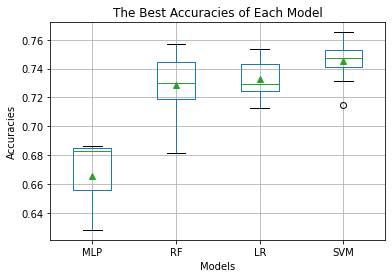

In [86]:
# Plotting the accuracy of the best performing setting of each model
data = [mlp_scores5, rf_scores4, lg_scores5, svm_scores3]
df = pd.DataFrame(data).transpose()
df.columns = ['MLP', 'RF', 'LR', 'SVM']
ax = df.plot.box(grid='True', title='The Best Accuracies of Each Model', showmeans=True)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracies')

# Prediction

In [87]:
# Predict the labels of the test data using SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(train_x, train_labels)
test_y_svm = svm.predict(test_x)

In [88]:
df1 = pd.DataFrame({'prediction': test_y_svm})

In [89]:
df1

,prediction
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
2162,0.0
2163,0.0
2164,0.0
2165,1.0


In [90]:
# Make the results a csv file and zip out
compression_opts = dict(method='zip', archive_name='test_results.csv') 
df1.to_csv('test_results.zip', index=False, compression=compression_opts)